In [63]:
import numpy as np
import string as str
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import pickle
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from wordcloud import wordcloud
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

In [37]:
#Unpickling
import pickle

infile = open('Train_AvgW2V','rb')
X_train_AvgW2V=pickle.load(infile)
infile.close()

infile = open('X_train','rb')
X_Train=pickle.load(infile)
infile.close()
X_Train=X_Train.tolist()


infile = open('tfidfW2V_sent_vectors_Train','rb')
X_train_TFIDF_W2V=pickle.load(infile)
infile.close()


In [3]:
from sklearn.preprocessing import StandardScaler
X_train_AvgW2V_2 = StandardScaler().fit_transform(X_train_AvgW2V)
X_train_TFIDF_W2V_2=StandardScaler().fit_transform(X_train_TFIDF_W2V)

# DBSCAN Plotting

In [7]:
def scanplot(X,epsilon):
    db = DBSCAN(eps=epsilon, min_samples=100).fit(X)
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)

    # Plot result
    import matplotlib.pyplot as plt

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
             for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    
    return db


In [69]:
def wordcloud(string):   
    words = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    max_words=2000, 
                    min_font_size = 10)
    wc=words.generate(string)    
    return wc

def Print_clusters(model):
    fig = plt.figure(figsize = (10,10))
    for i in np.unique(model.labels_):
        str1=""
        for j in np.where(model.labels_)[0]:
            str1+=X_Train[j]
            str1+=" "
        word=wordcloud(str1)
        fig.add_subplot(2,2,i+2)
        plt.imshow(word) 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.title("Cluster:%d" %i+",Size=%d"%len(np.where(model.labels_==i)[0]),fontsize=20)
    plt.show() 

# Optimal EPS- AvgW2V

Text(0.5,1,'Optimal Epsilon- AvgW2V')

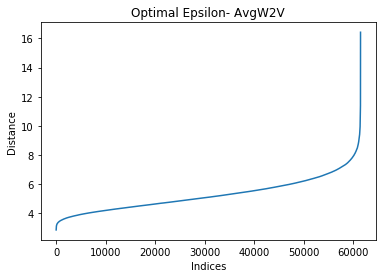

In [5]:
ns = 100 #2*50
nbrs = NearestNeighbors(n_neighbors=ns).fit(X_train_AvgW2V_2)
distances, indices = nbrs.kneighbors(X_train_AvgW2V_2)
distanceAsc = sorted(distances[:,ns-1])
plt.plot(list(range(1,len(indices)+1)), distanceAsc)
plt.xlabel("Indices")
plt.ylabel("Distance")
plt.title("Optimal Epsilon- AvgW2V")

It is observed that there is sudden shoot from around epsilon distance=7.5 with MinPoints=100 (as per thumb rule-2*d)

In [17]:
import pickle
filename='NearestNeighbors_DBSCAN_avgw2v'
outfile=open(filename,'wb')
pickle.dump(nbrs, outfile)
outfile.close

filename='dbscan_7_avgw2v'
outfile=open(filename,'wb')
pickle.dump(db_7, outfile)
outfile.close

filename='dbscan_75_avgw2v'
outfile=open(filename,'wb')
pickle.dump(db_75, outfile)
outfile.close

filename='dbscan_65_avgw2v'
outfile=open(filename,'wb')
pickle.dump(db_65, outfile)
outfile.close

<function close>

Estimated number of clusters: 1


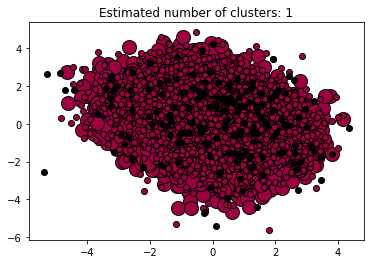

In [12]:
db_75=scanplot(X_train_AvgW2V_2,7.5) #Optimal Epsilon

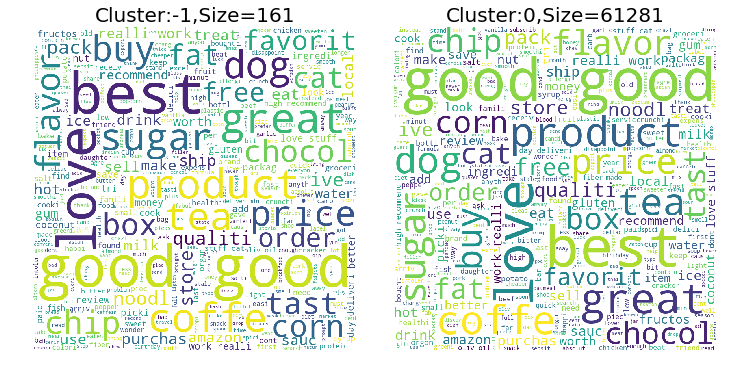

In [72]:
Print_clusters(db_75) #Optimal Epsilon

Estimated number of clusters: 1


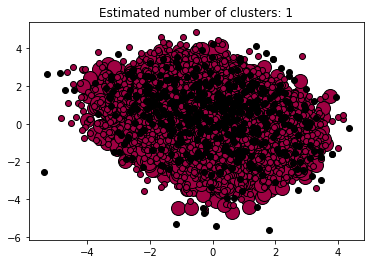

In [10]:
db_7=scanplot(X_train_AvgW2V_2,7)

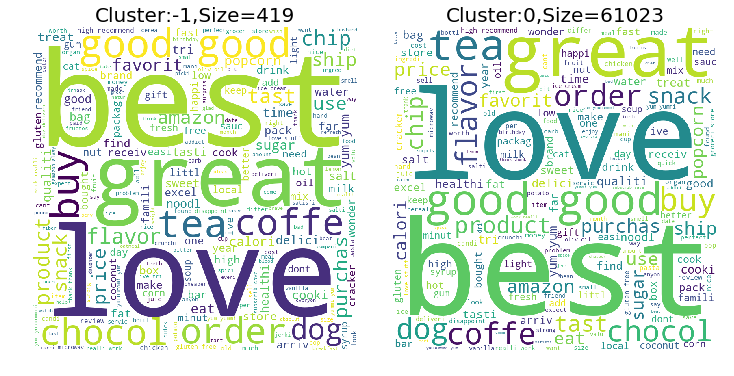

In [70]:
Print_clusters(db_7)

Estimated number of clusters: 1


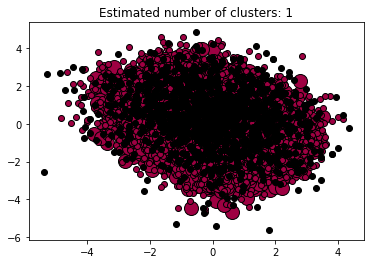

In [11]:
db_65=scanplot(X_train_AvgW2V_2,6.5)

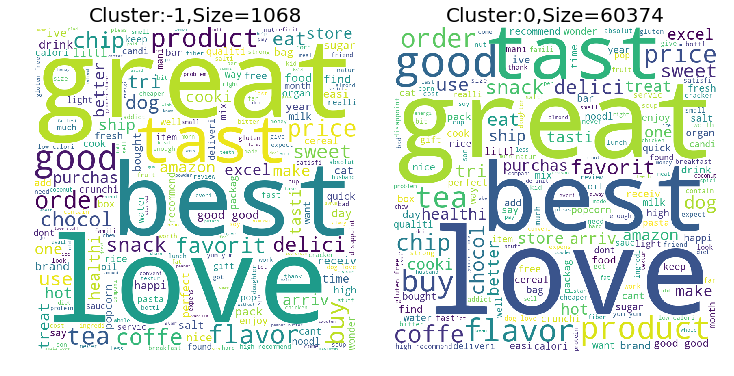

In [71]:
Print_clusters(db_65)

It is observed that the number of noise points are varying when the Epsilon valued is modified slightly which is as expected as DBSCAN is very sensitive

# TFIDFW2V

# Optimal EPS- TFIDFW2V

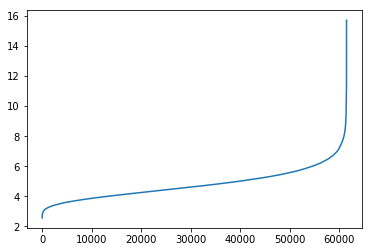

In [13]:
ns = 100 #2*50
nbrs = NearestNeighbors(n_neighbors=ns).fit(X_train_TFIDF_W2V_2)
distances, indices = nbrs.kneighbors(X_train_TFIDF_W2V_2)
distanceAsc = sorted(distances[:,ns-1])
plt.plot(list(range(1,len(indices)+1)), distanceAsc)

It is observed that there is sudden shoot from epsilon distance=6.5 with MinPoints=100(as per Thumb rule-2*d)

In [18]:
import pickle
filename='NearestNeighbors_DBSCAN_tfidf2v'
outfile=open(filename,'wb')
pickle.dump(nbrs, outfile)
outfile.close

filename='dbscan_65_tfidfw2v'
outfile=open(filename,'wb')
pickle.dump(db_65_tfidf, outfile)
outfile.close

filename='dbscan_6_tfidfw2v'
outfile=open(filename,'wb')
pickle.dump(db_6_tfidf, outfile)
outfile.close

filename='dbscan_55_tfidfw2v'
outfile=open(filename,'wb')
pickle.dump(db_55_tfidf, outfile)
outfile.close

<function close>

Estimated number of clusters: 1


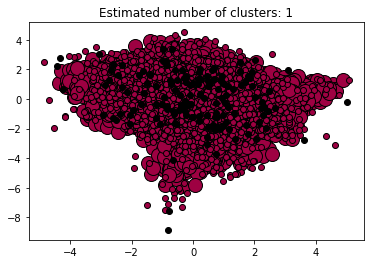

In [14]:
db_65_tfidf=scanplot(X_train_TFIDF_W2V_2,6.5)#Optimal Epsilon

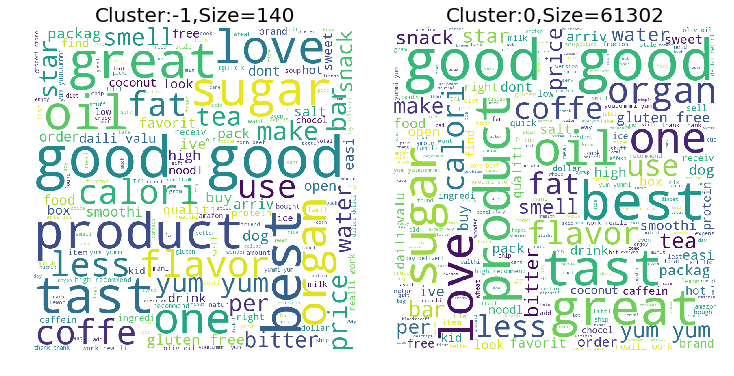

In [73]:
Print_clusters(db_65_tfidf)

Estimated number of clusters: 1


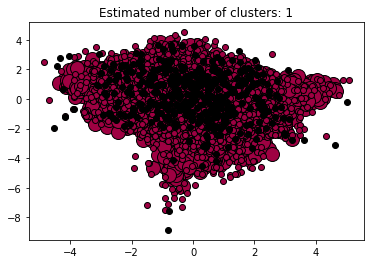

In [15]:
db_6_tfidf=scanplot(X_train_TFIDF_W2V_2,6) 

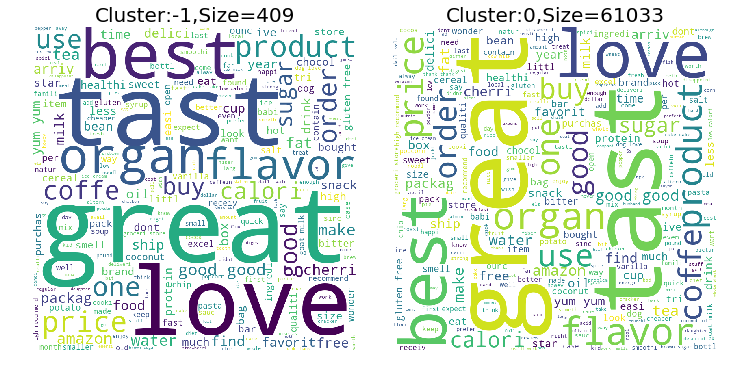

In [74]:
Print_clusters(db_6_tfidf)

Estimated number of clusters: 1


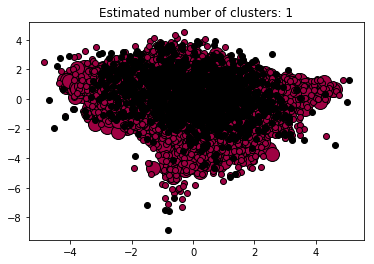

In [16]:
db_55_tfidf=scanplot(X_train_TFIDF_W2V_2,5.5)

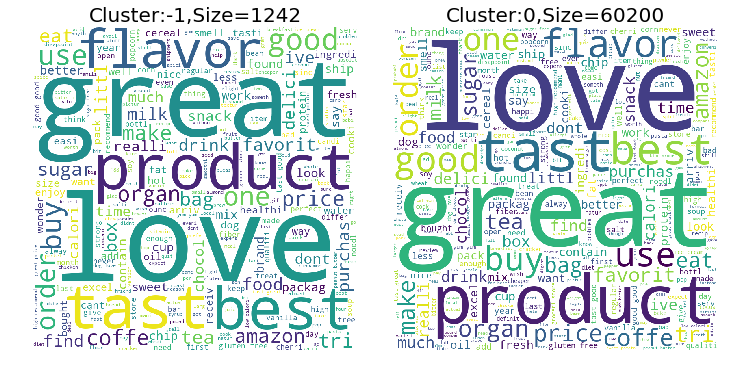

In [75]:
Print_clusters(db_55_tfidf)

It is observed that the number of noise points(on seeing the count of nosie points) are varying when the Epsilon valued is modified slightly which is as expected as DBSCAN is very sensitive

# Conclusion

It is observed that tfidfw2v model is performing better at the optimal distance values when we check the noise points